In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats


In [9]:
data = pd.read_csv("Employee_Attrition_data.csv", delimiter='\t')

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.shape

(1470, 35)

In [12]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Label Encoding Dependent Variable

In [13]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()
data["Attrition"]= label_encoder.fit_transform(data["Attrition"])

In [14]:
data["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# Variables Types

In [75]:
data.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Checking for Missing Values

In [16]:
# now we are checking for missing values in data 

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(5))
print(missing_data.shape)

                      Total  Percent
YearsWithCurrManager      0      0.0
EmployeeCount             0      0.0
JobLevel                  0      0.0
JobInvolvement            0      0.0
HourlyRate                0      0.0
(35, 2)


In [17]:
# nwe we are saving are missing value file  

missing_data.to_csv("missing_data.csv")

# Dividing Data into Categorical and Numerical Features

In [18]:
# after that we divding data into categorical and numerical features

numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])


In [19]:
print(numeric_data.shape)
print(categorical_data.shape)

(1470, 27)
(1470, 8)


In [20]:
numeric_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


# Visulization of features

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

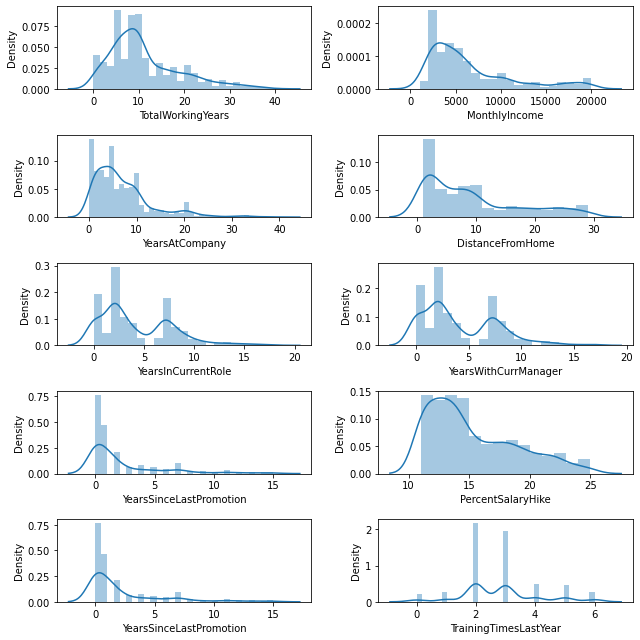

In [82]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(data['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(data['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(data['YearsAtCompany'], ax = ax[1,0])
sns.distplot(data['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(data['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(data['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(data['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(data['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

# Distribution of Dependent variables

E:\anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\anaconda\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


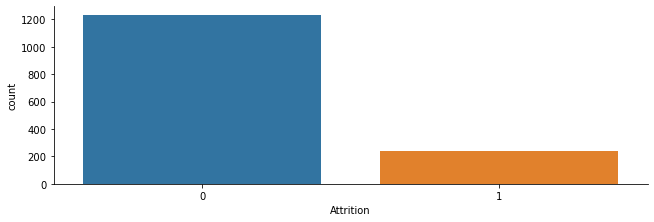

In [83]:
sns.factorplot(data=data, kind = 'count', size=3, aspect=3, x = 'Attrition')


# Heatmap (Pearson correlation coefficient)

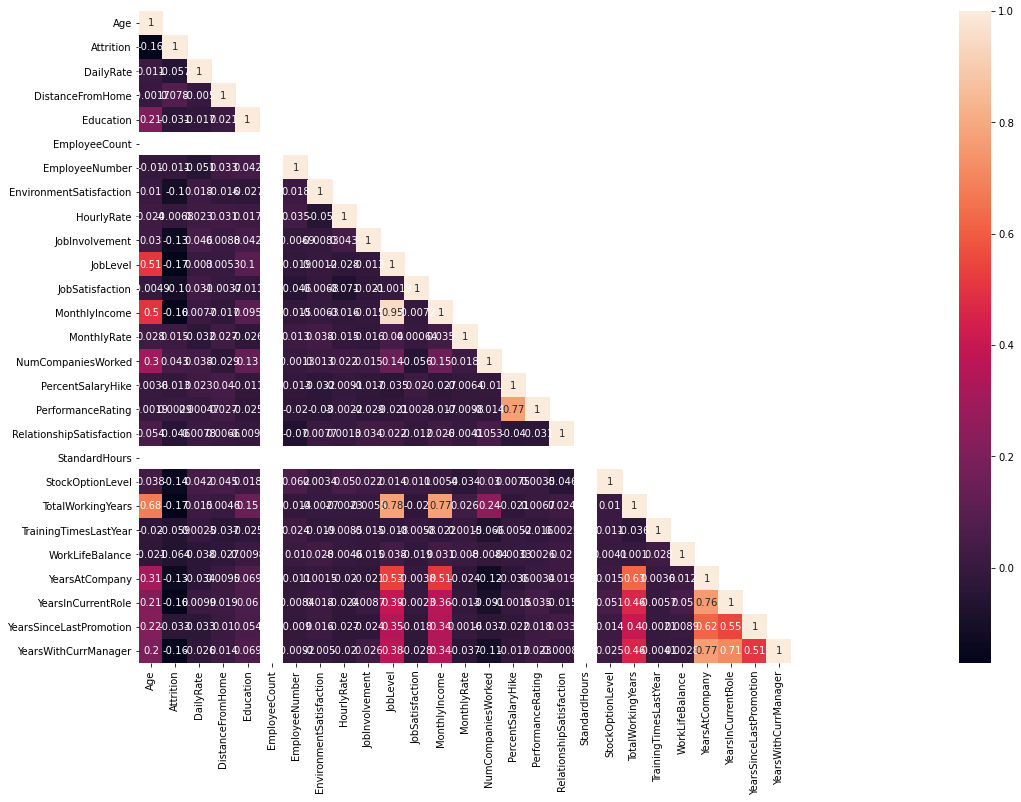

In [84]:
cor_mat = data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)


# Detection of Outliers

In [85]:
numeric_variables = numeric_data.columns.tolist()

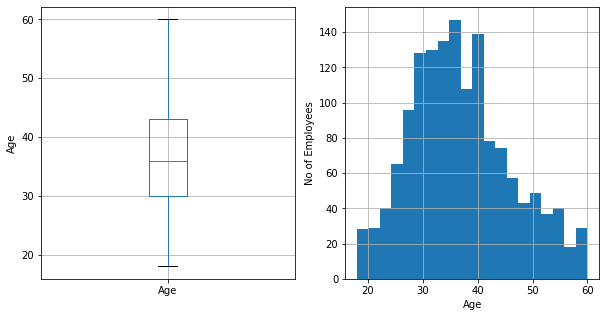

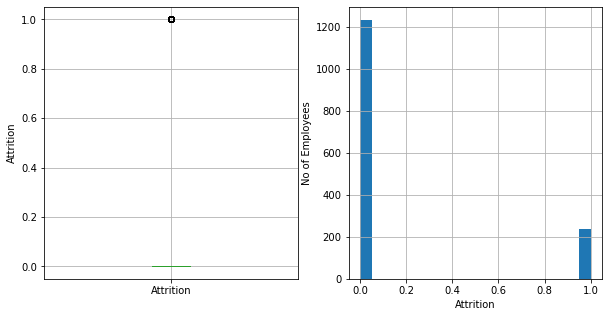

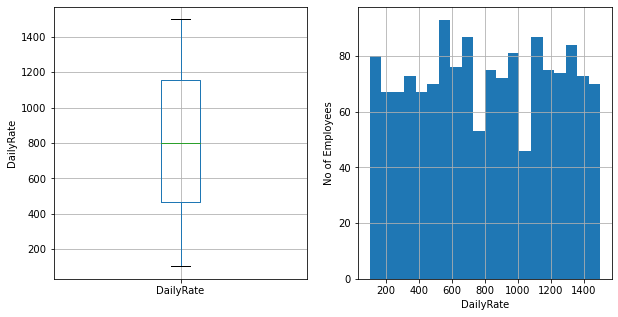

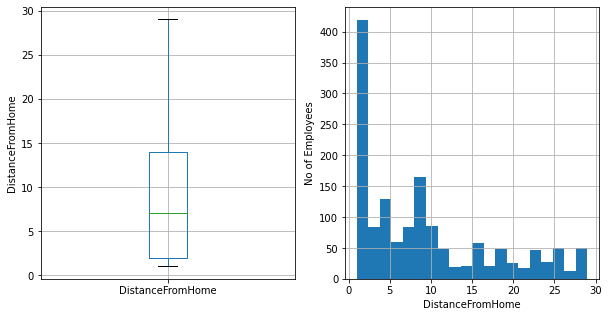

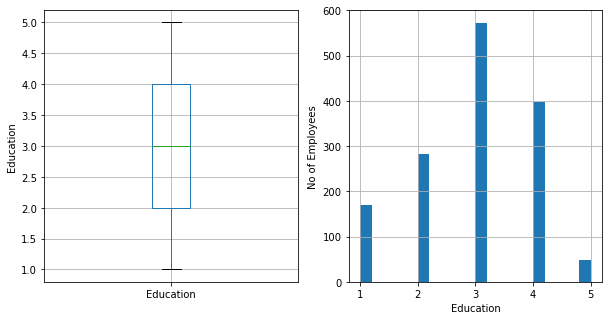

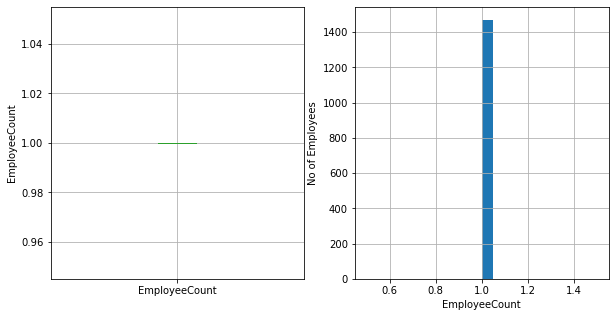

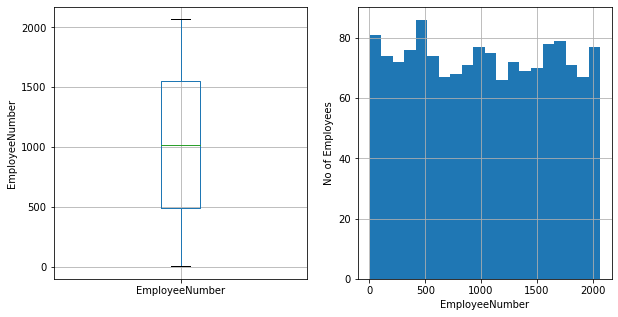

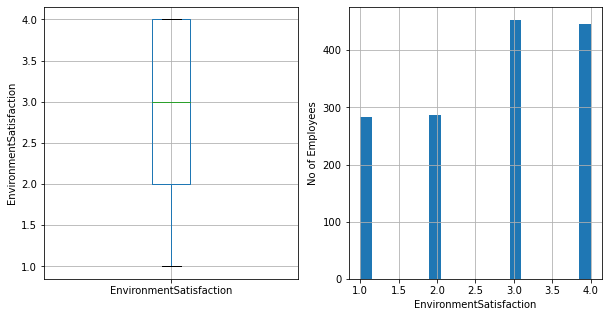

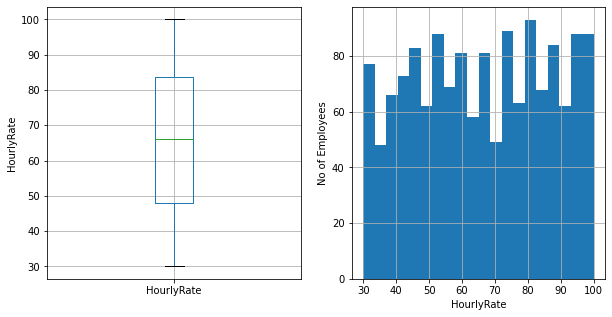

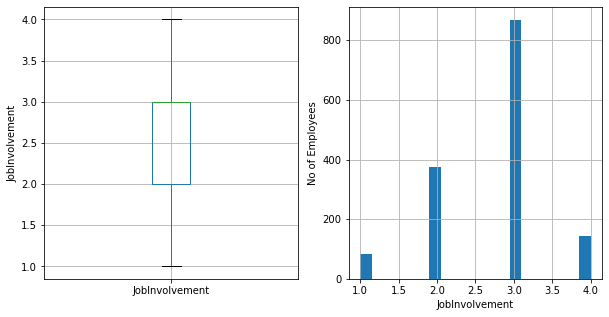

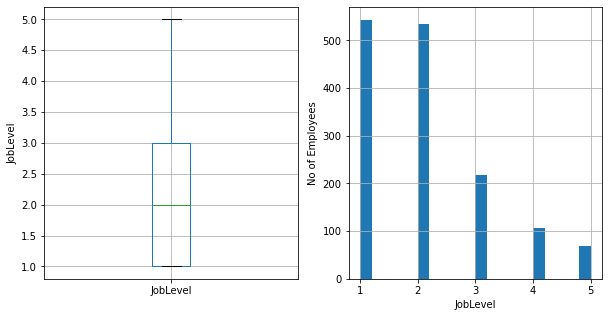

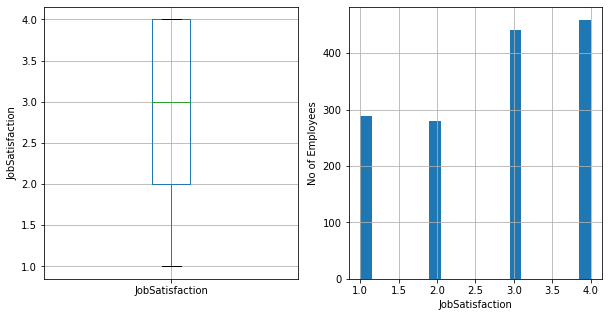

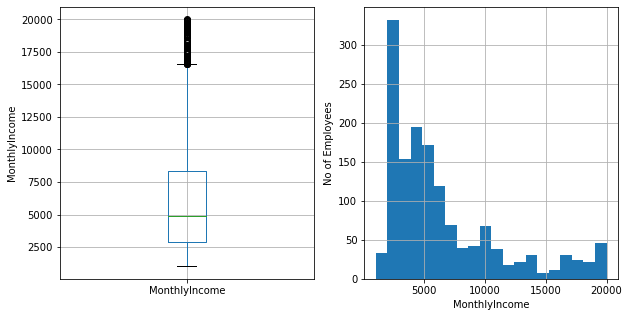

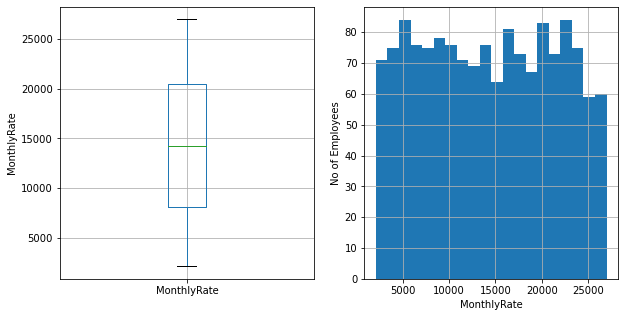

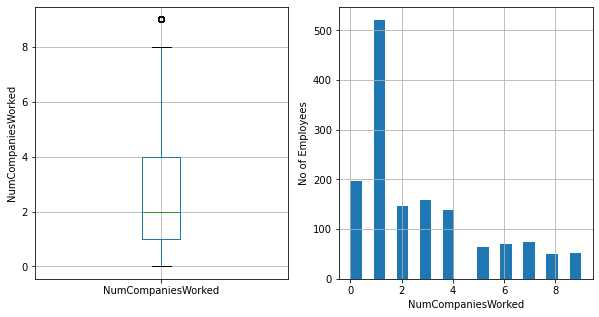

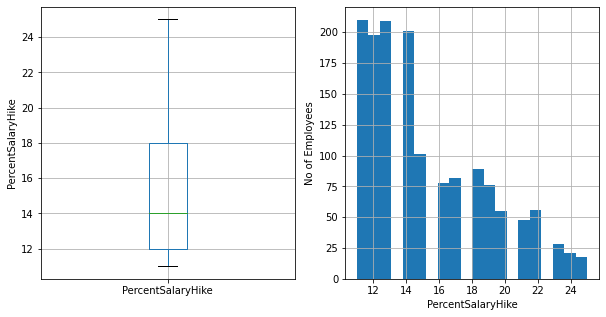

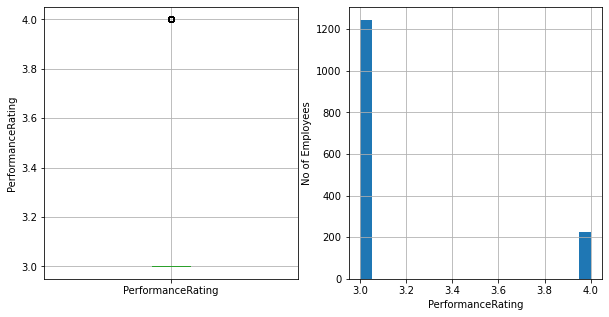

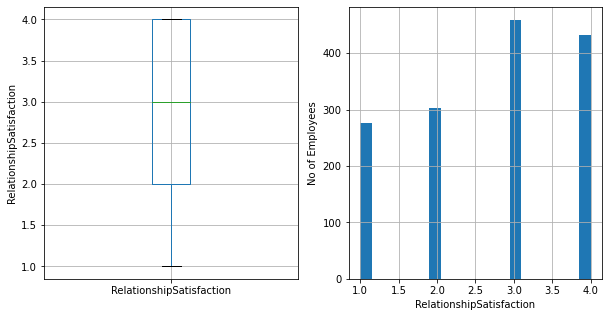

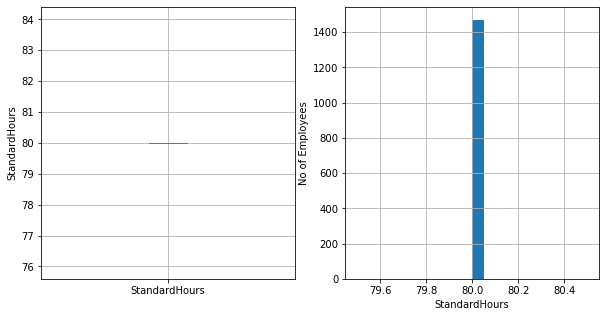

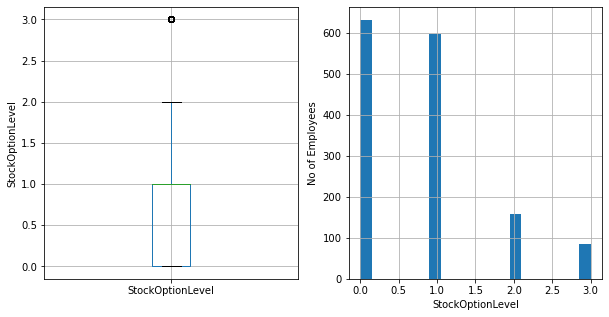

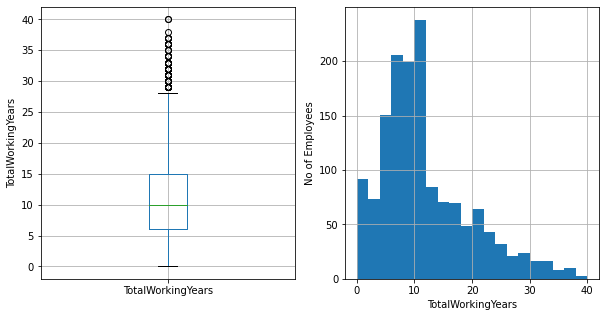

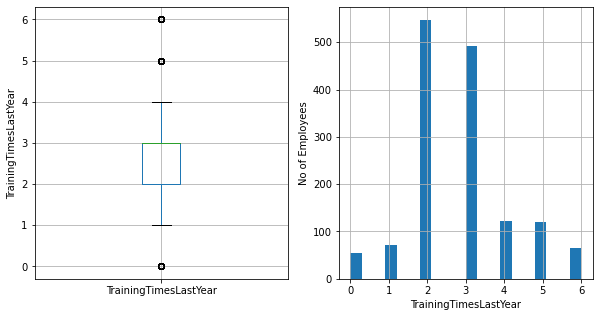

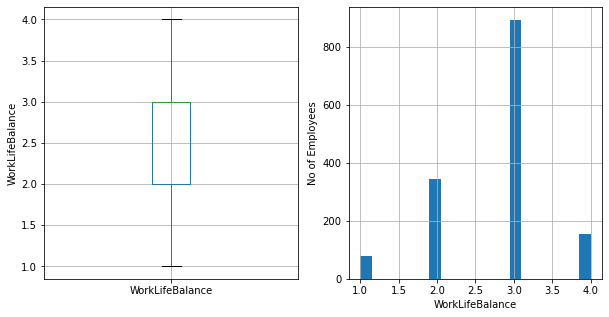

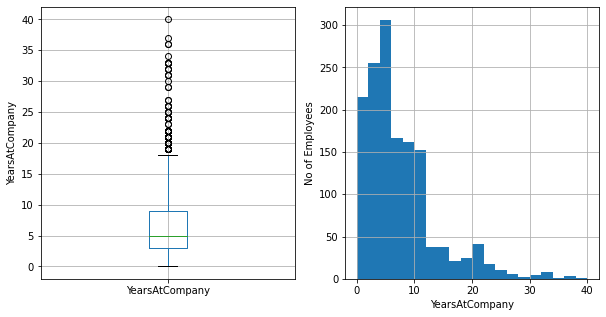

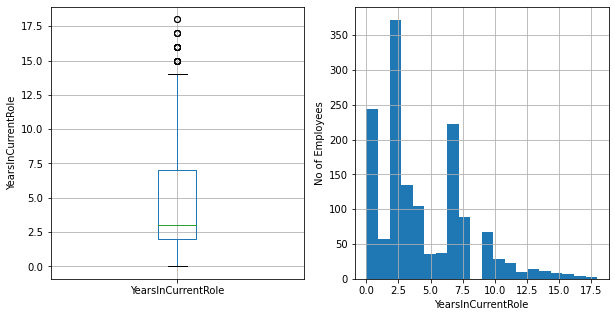

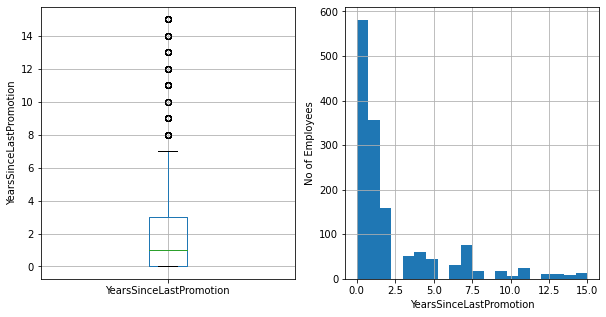

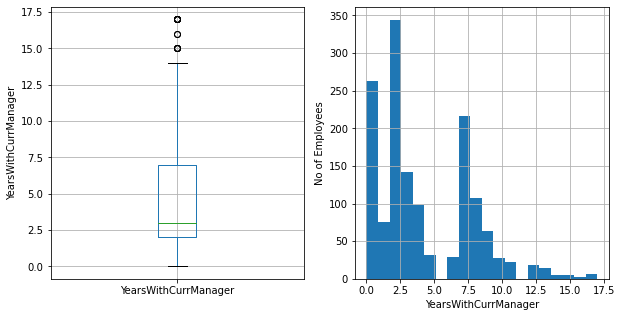

In [86]:
for var in numeric_variables:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fig = data.boxplot(column = var)
    fig.set_ylabel(var)
    plt.subplot(1,2,2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('No of Employees')
    fig.set_xlabel(var)
    plt.show()

# Handling outliers

In [87]:
outlier_column = ["MonthlyIncome","TotalWorkingYears","TrainingTimeLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


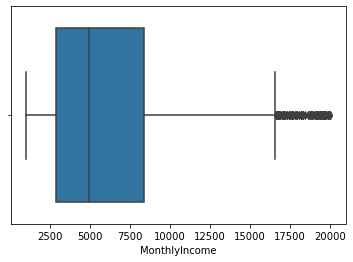

In [88]:
sns.boxplot(data['MonthlyIncome'])


In [89]:
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape


TypeError: can't multiply sequence by non-int of type 'float'

# Handle categorical data

In [22]:
attrition_cat = pd.get_dummies(categorical_data)

In [23]:
attrition_cat.shape

(1470, 29)

# Concatenating Numerical and categorical columns

In [24]:
attrition_final = pd.concat([numeric_data, attrition_cat], axis=1)


In [25]:
attrition_final.shape

(1470, 56)

In [26]:
attrition_final["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# Train Test split

In [27]:
X = attrition_final.drop("Attrition", axis=1)
Y = attrition_final["Attrition"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [30]:
X_train.shape

(1176, 55)

# Baseline models

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model  = RandomForestClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))


Accuracy:  0.8605442176870748
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       245
           1       0.90      0.18      0.31        49

    accuracy                           0.86       294
   macro avg       0.88      0.59      0.61       294
weighted avg       0.87      0.86      0.82       294



# Handling Imbalanced data by SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
oversampler = SMOTE(random_state = 0)
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model  = RandomForestClassifier()
model.fit(smote_train, smote_target)
model_predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))


Accuracy:  0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.76      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294

